In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    0.043163
1    0.412919
2   -0.039314
3   -0.462154
Name: daily returns, dtype: float64

In [6]:
s.describe()

count    4.000000
mean    -0.011347
std      0.359157
min     -0.462154
25%     -0.145024
50%      0.001924
75%      0.135602
max      0.412919
Name: daily returns, dtype: float64

In [7]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [9]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']

In [10]:
s

AMZN    0.043163
AAPL    0.412919
MSFT   -0.039314
GOOG   -0.462154
Name: daily returns, dtype: float64

In [31]:
import urllib.request
source = urllib.request.urlopen('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [32]:
data = pd.read_csv(source, index_col=0, parse_dates=True, header=None)

In [33]:
type(data)

pandas.core.frame.DataFrame

In [34]:
data.head()

,1
0,
DATE,VALUE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9


In [35]:
data.describe()

,1
count,831
unique,81
top,5.4
freq,33


In [36]:
from pandas_datareader import data,wb

In [37]:
import datetime as dt

In [38]:
start, end = dt.datetime(2006, 1, 1), dt.datetime(2016, 12, 31)

In [39]:
data2 = data.DataReader('UNRATE', 'fred', start, end)

In [40]:
data2.plot()

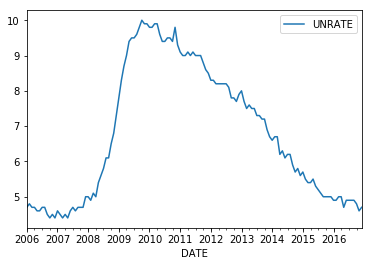

In [41]:
plt.show()

##### Exercise 1

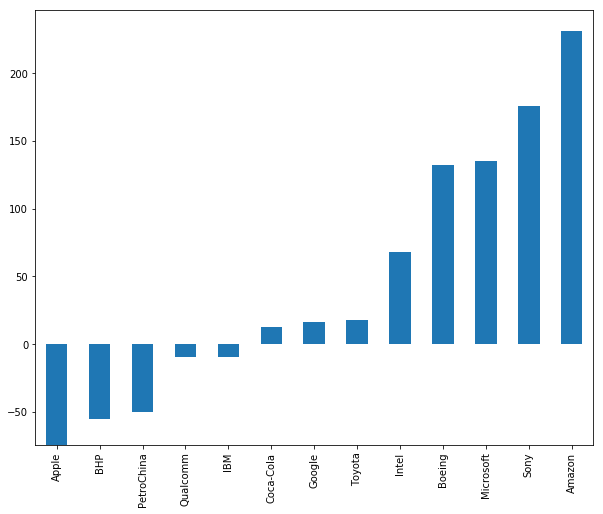

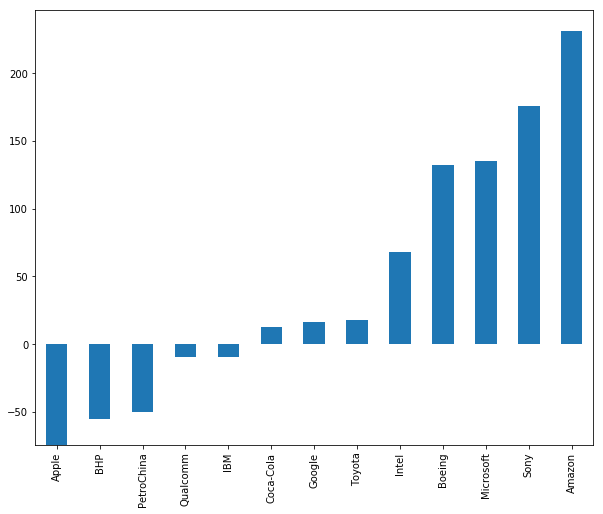

In [45]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

start = dt.datetime(2013, 1, 1)
end = dt.datetime.today()

price_change = {}

for ticker in ticker_list:
    prices = data.DataReader(ticker, 'yahoo', start, end)
    closing_prices = prices['Close']
    change = 100 * (closing_prices[-1] - closing_prices[0]) / closing_prices[0]
    name = ticker_list[ticker]
    price_change[name] = change

pc = pd.Series(price_change)
pc.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
pc.plot(kind='bar', ax=ax)
plt.show()